In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sqlalchemy import create_engine
from password import password

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [46]:
protocol = 'postgresql'
username = 'postgres'
password = password
host = 'localhost'
port = 5432
database_name = 'churn_pred'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)
connection = engine.connect()

In [47]:
df = pd.read_sql("SELECT * FROM fact_churn", connection)
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,1,0,0,1
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,1,0,1,1,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,...,0,0,0,0,1,0,1,0,1,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,...,0,0,0,0,0,1,1,0,1,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,...,0,0,0,0,1,0,1,0,1,0


In [48]:
# Split the data into X_train, X_test, y_train, y_test
X = df.drop(['churn'], axis=1)
y = df['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.sample(5)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
4799,101,0,195.8,105,33.29,184.5,109,15.68,172.0,128,...,0,0,0,0,0,1,1,0,1,0
2388,108,42,130.1,90,22.12,167.0,128,14.20,244.7,80,...,0,0,0,0,1,0,0,1,0,1
281,59,0,153.6,92,26.11,205.5,88,17.47,114.5,89,...,0,0,0,0,0,1,1,0,1,0
1935,104,0,167.6,116,28.49,219.2,112,18.63,215.9,94,...,0,0,0,1,0,0,1,0,1,0
2498,90,0,114.4,122,19.45,127.7,154,10.85,253.1,109,...,0,0,0,0,1,0,1,0,1,0


k: 1, Train/Test Score: 1.000/0.742
k: 2, Train/Test Score: 0.863/0.802
k: 3, Train/Test Score: 0.872/0.788
k: 4, Train/Test Score: 0.846/0.803
k: 5, Train/Test Score: 0.848/0.801
k: 6, Train/Test Score: 0.835/0.811
k: 7, Train/Test Score: 0.837/0.808
k: 8, Train/Test Score: 0.832/0.811
k: 9, Train/Test Score: 0.833/0.810
k: 10, Train/Test Score: 0.830/0.811
k: 11, Train/Test Score: 0.832/0.810
k: 12, Train/Test Score: 0.830/0.810
k: 13, Train/Test Score: 0.831/0.810
k: 14, Train/Test Score: 0.829/0.810
k: 15, Train/Test Score: 0.830/0.809
k: 16, Train/Test Score: 0.829/0.810
k: 17, Train/Test Score: 0.829/0.809
k: 18, Train/Test Score: 0.828/0.810
k: 19, Train/Test Score: 0.829/0.810


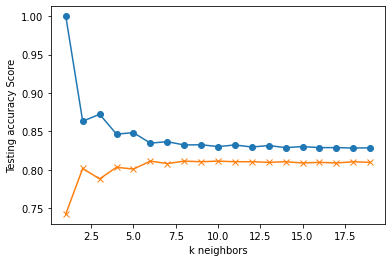

In [17]:
#Elbow Graph
train_scores = []
test_scores = []
for k in range(1, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 1), train_scores, marker='o')
plt.plot(range(1, 20, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [29]:
#Optimisng the model
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, scoring='accuracy',cv=10)
#Fit the model
best_model = clf.fit(X, y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 1
Best n_neighbors: 11


In [49]:
#Classification report with optimised model
train_scores = []
test_scores = []

knn = KNeighborsClassifier(n_neighbors=11,weights='uniform', algorithm='auto', leaf_size=1, p=1, metric='minkowski', metric_params=None, n_jobs=None)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
train_scores.append(train_score)
test_scores.append(test_score)
print(f"Train/Test Score: {train_score:.3f}/{test_score:.3f}")


y_pred = knn.predict(X_test_scaled)
target_names = ['churn: no', 'churn: yes']
print(classification_report(y_test, y_pred, target_names=target_names))



Train/Test Score: 0.834/0.811
              precision    recall  f1-score   support

   churn: no       0.81      1.00      0.90      1013
  churn: yes       0.57      0.02      0.03       237

    accuracy                           0.81      1250
   macro avg       0.69      0.51      0.46      1250
weighted avg       0.77      0.81      0.73      1250



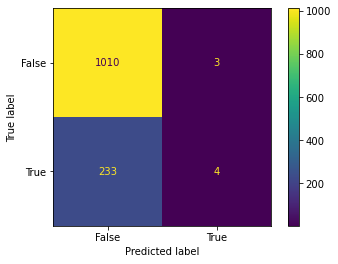

In [50]:
#Default run W/O a threshold

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

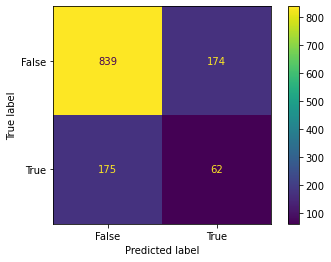

In [73]:
#With a threshold
thresh = 0.23
pt = np.where(knn.predict_proba(X_test_scaled)[:,1] > thresh, 1, 0)

confusion_matrix = metrics.confusion_matrix(y_test, pt)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()